# WUT Trapped Lovers

The Trapped Lovers dataset is a three-dimensional artificial dataset that contains 5000 points belonging to three classes. The classes are represented by three spheres that are nested inside each other, like two balls inside a larger ball. The spheres have different densities and are not linearly separable, which means that there is no straight line that can divide them into three groups without any errors. This makes the dataset challenging for some clustering algorithms, such as k-means.

In [1]:
from src.models.NBC import NBC
from src.models.TI_NBC import TI_NBC
from src.models.sklearn_NBC import sklearn_NBC
from src.AnalysisHelper import plot_results, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [2]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "wut"
dataset = "trapped_lovers"
methods = ["TI_NBC", "NBC", "sklearn_NBC", "sklearn_kmeans"]
k = 50

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC

In [5]:
%%time
model = NBC(k)
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 1min 56s
Wall time: 2min 3s


## TI-NBC

In [6]:
%%time
model = TI_NBC(k)
results["TI_NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 1min 11s
Wall time: 1min 13s


## NBC using sklearn.neighbors

In [7]:
%%time
model = sklearn_NBC(k)
results["sklearn_NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 93.8 ms
Wall time: 107 ms


## Comparison

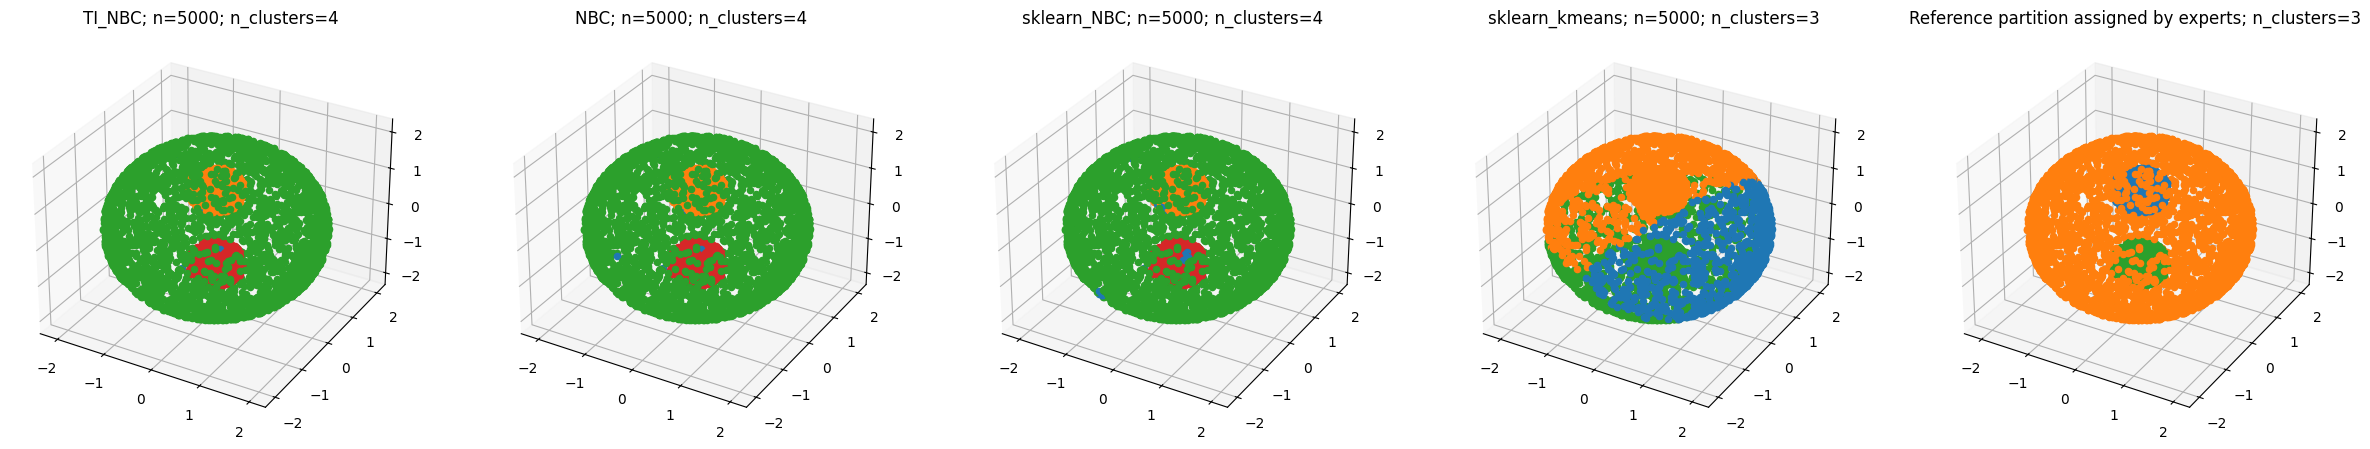

In [8]:
plot_results(benchmark.data, methods, results, reference)

In [9]:
confusion_matricies_table(methods, results, reference, title=f"Confusion matricies\nk={k}")

Confusion matricies
k=50
╒═════════════════════════╤═════════════════════════╤═════════════════════════╤════════════════════╕
│ TI_NBC                  │ NBC                     │ sklearn_NBC             │ sklearn_kmeans     │
│ [[   5  995    0    0]  │ [[   6  994    0    0]  │ [[   6  994    0    0]  │ [[   0 1000    0]  │
│  [   6    0 2994    0]  │  [   7    0 2993    0]  │  [  12    0 2988    0]  │  [ 861 1054 1085]  │
│  [   1    0    0  999]] │  [   1    0    0  999]] │  [   6    0    0  994]] │  [   0    0 1000]] │
╘═════════════════════════╧═════════════════════════╧═════════════════════════╧════════════════════╛


In [10]:
measures(methods, results, reference, title=f"Measures\nk={k}")

Measures
k=50
╒═════════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│ TI_NBC                  │ NBC                      │ sklearn_NBC              │ sklearn_kmeans           │
│ ar: 0.9961044965699303  │ ar: 0.9954559503280528   │ ar: 0.9922044088906379   │ ar: 0.15394891175048728  │
│ r: 0.9980812962592519   │ r: 0.9977620324064813    │ r: 0.9961621124224845    │ r: 0.5899764752950589    │
│ fm: 0.9978167162546987  │ fm: 0.9974529637203805   │ fm: 0.9956280972527447   │ fm: 0.49681305197324743  │
│ afm: 0.9961087081615656 │ afm: 0.9954616730019592  │ afm: 0.9922211001935201  │ afm: 0.15485259285803124 │
│ mi: 0.9480663125492511  │ mi: 0.947755564282063    │ mi: 0.9452798795332029   │ mi: 0.3769719052493272   │
│ nmi: 0.99021457568424   │ nmi: 0.9888800455242293  │ nmi: 0.981666173590847   │ nmi: 0.38012848124807214 │
│ ami: 0.9902081868274436 │ ami: 0.9888728401635876  │ ami: 0.9816545516239871  │ ami: 0.37987814054669444 │
│ npa